# Phase1

Authors:
@Priyank Raj Sharma
@Rhonda Kay Fischer
@Adam Paul Garofalo

All three of us have worked over the screen share to complete the full assignment.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Read breast cancer data from the provided csv file

In [3]:
data = pd.read_csv("../data/Breast-Cancer-Wisconsin.csv")

data.head()

,Scn,A2,A3,A4,A5,A6,A7,A8,A9,A10,CLASS
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


For column A7, replace entries of "?" with "NaN" and then convert the column to numeric

In [4]:
data["A7"] = data["A7"].replace("?",np.nan)
data["A7"] = pd.to_numeric(data["A7"])

Print the number of null values (i.e., "NaN" entries) for column A7

In [5]:
print("A7 null values:", data["A7"].isnull().sum())

A7 null values: 16


For the entire data set, replace any "NaN" entries with the mean of the column they are in.  Then check that there are no null values left in the data set.

In [6]:
# Replace NaN values with the mean of column A7
data = data.fillna(data.mean())
data = data.astype("int64")
print("Total null values: ",data.isnull().sum())

Total null values:  Scn      0
A2       0
A3       0
A4       0
A5       0
A6       0
A7       0
A8       0
A9       0
A10      0
CLASS    0
dtype: int64


Print summary statistics for the data, sorted by column.  Note that while all columns are being described, there is no statistical value to the information for column Scn, which is just unique ID numbers.

In [7]:
print(data.describe())

                Scn          A2          A3          A4          A5  \
count  6.990000e+02  699.000000  699.000000  699.000000  699.000000   
mean   1.071704e+06    4.417740    3.134478    3.207439    2.806867   
std    6.170957e+05    2.815741    3.051459    2.971913    2.855379   
min    6.163400e+04    1.000000    1.000000    1.000000    1.000000   
25%    8.706885e+05    2.000000    1.000000    1.000000    1.000000   
50%    1.171710e+06    4.000000    1.000000    1.000000    1.000000   
75%    1.238298e+06    6.000000    5.000000    5.000000    4.000000   
max    1.345435e+07   10.000000   10.000000   10.000000   10.000000   

               A6          A7          A8          A9         A10       CLASS  
count  699.000000  699.000000  699.000000  699.000000  699.000000  699.000000  
mean     3.216023    3.532189    3.437768    2.866953    1.589413    2.689557  
std      2.214300    3.602774    2.438364    3.053634    1.715078    0.951273  
min      1.000000    1.000000    1.00000

Print the number of rows and columns in the dataframe file

In [8]:
print("Rows: {0}, Columns: {1}".format(data.shape[0],data.shape[1]))

Rows: 699, Columns: 11


Print the number of unique ID numbers in the Scn column

In [9]:
print("Scn total unique id:",len(data["Scn"].unique()))

Scn total unique id: 645


Create histograms for each of the data columns (A2 through CLASS)

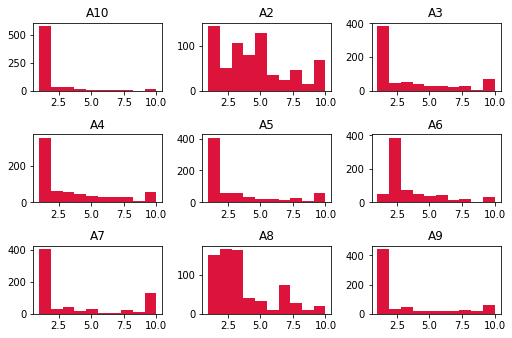

In [10]:
hist_data = data.loc[:,'A2':'A10']
hist_data.hist(color=["crimson"], grid=False)
plt.tight_layout(rect=(0, 0, 1.2, 1.2))

For reference, print the count of cancer class in the data

In [11]:
print(data.groupby("CLASS")["CLASS"].count())

CLASS
2    458
4    241
Name: CLASS, dtype: int64


Create bar chart of the data in the last column (CLASS) that shows the charaterization of benign or malignant observations.

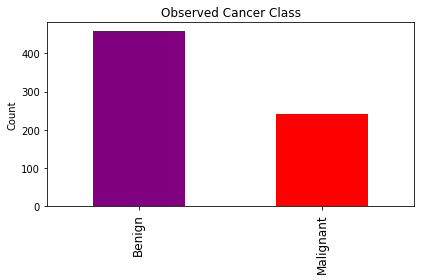

In [12]:
classes = pd.value_counts(data["CLASS"])
fig_bar = plt.figure()
sp = fig_bar.add_subplot(1, 1, 1)
classes.plot(kind='bar', color=['purple','red'])
labels = sp.set_xticklabels(['Benign', 'Malignant'], fontsize='large')
sp.set_title('Observed Cancer Class', fontsize='large')
sp.set_ylabel('Count')
plt.tight_layout()

Generate scatter plot of two columns of data.

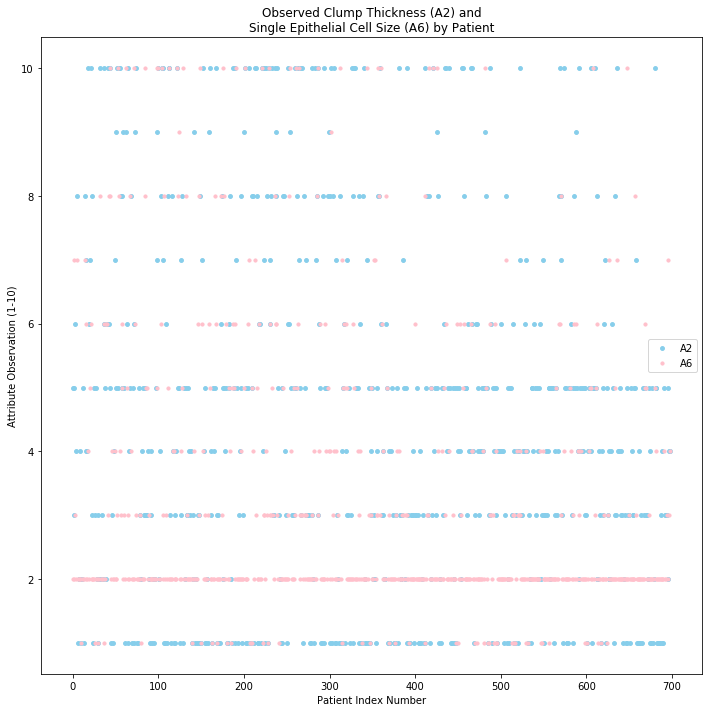

In [13]:
scatter_x = data.index
scatter_y1 = data['A2']
scatter_y2 = data['A6']
fig_scatter = plt.figure()
fig_scatter.set_figheight(10)
fig_scatter.set_figwidth(10)
sp2 = fig_scatter.add_subplot(1,1,1)
plt.scatter(scatter_x, scatter_y1, s=15, color="skyblue")
plt.scatter(scatter_x, scatter_y2, s=10, color="pink")
sp2.set_title('Observed Clump Thickness (A2) and' + "\n" + 'Single Epithelial Cell Size (A6) by Patient')
sp2.set_xlabel('Patient Index Number')
sp2.set_ylabel('Attribute Observation (1-10)')
sp2.legend(loc='best')
plt.tight_layout()

Generate correlation matrix of the observations.

In [14]:
data.loc[:,'A2':'A10'].corr()

,A2,A3,A4,A5,A6,A7,A8,A9,A10
A2,1.000000,0.644913,0.654589,0.486356,0.521816,0.588433,0.558428,0.535835,0.350034
A3,0.644913,1.000000,0.906882,0.705582,0.751799,0.687417,0.755721,0.722865,0.458693
A4,0.654589,0.906882,1.000000,0.683079,0.719668,0.709812,0.735948,0.719446,0.438911
A5,0.486356,0.705582,0.683079,1.000000,0.599599,0.666086,0.666715,0.603352,0.417633
A6,0.521816,0.751799,0.719668,0.599599,1.000000,0.582331,0.616102,0.628881,0.479101
A7,0.588433,0.687417,0.709812,0.666086,0.582331,1.000000,0.676167,0.577347,0.339844
A8,0.558428,0.755721,0.735948,0.666715,0.616102,0.676167,1.000000,0.665878,0.344169
A9,0.535835,0.722865,0.719446,0.603352,0.628881,0.577347,0.665878,1.000000,0.428336
A10,0.350034,0.458693,0.438911,0.417633,0.479101,0.339844,0.344169,0.428336,1.000000


Graphically represent the coorelation matrix generated above.

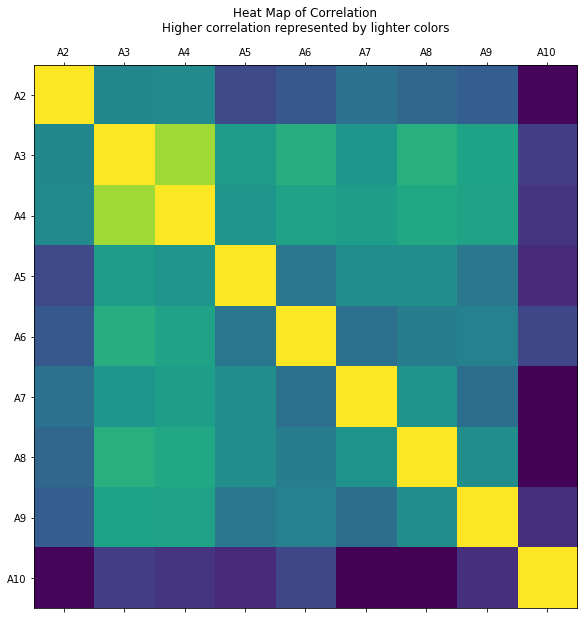

In [15]:
def plot_corr(bcancer,size=10):
    corr = bcancer.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    plt.title('Heat Map of Correlation' + '\n' + 'Higher correlation represented by lighter colors')
plot_corr(data.loc[:,'A2':'A10'],size = 10)

# Summary

1. Above bar chart shows, Benign cases are more than malignant
2. Corelation Matrix shows. 
   Scn column has no significance to classify Benign and malignant cases. Scn column can be ignored.
   A2 - A10 columns are important to classify Benign and malignant cases.

In [16]:
from sklearn.cluster import KMeans

In [17]:
model = KMeans(n_clusters=4)
model.fit(hist_data)
centroids = model.cluster_centers_
np.set_printoptions(precision=2)
print((centroids))

[[2.94 1.24 1.37 1.29 2.04 1.34 2.06 1.2  1.08]
 [6.76 8.39 8.42 7.75 6.77 9.21 7.37 7.74 3.79]
 [7.46 7.03 6.68 4.2  5.54 3.42 5.38 6.82 2.31]
 [7.23 4.85 5.04 4.86 4.12 9.38 5.27 3.79 1.65]]


In [18]:
k = range(1,16)
inertias = []

In [19]:
for x in k:
    model_b = KMeans(n_clusters=x)
    model_b.fit(hist_data)
    inertias.append(model_b.inertia_)

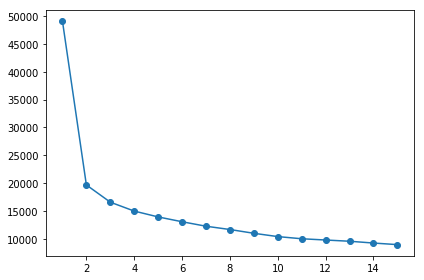

In [21]:
plt.plot(k, inertias, '-o')
plt.tight_layout()

In [22]:
std_dev = hist_data.std()
means = hist_data.mean()

In [23]:
mean_values = []
standard_dev = []
for x in range(0,9):
    mean_values.append(means[x])
for x in range(0,9):
    standard_dev.append(std_dev[x])

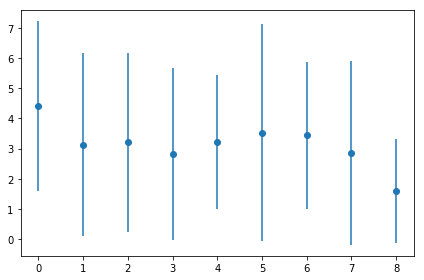

In [24]:
plt.errorbar(range(0,9), mean_values, yerr=standard_dev, fmt='o')
plt.tight_layout()

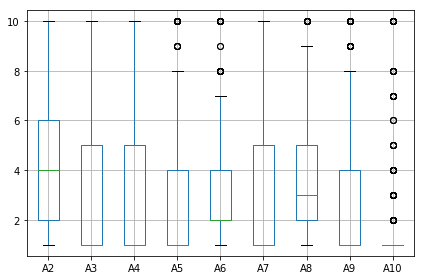

In [25]:
hist_data.boxplot()
plt.tight_layout()

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()
model_c = KMeans(n_clusters=2)

In [28]:
from sklearn.pipeline import make_pipeline

In [29]:
pipeline = make_pipeline(scaler, model_c)

In [30]:
pipeline.fit(hist_data)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

In [31]:
centroids_b = model_c.cluster_centers_
np.set_printoptions(precision=2)
print((centroids_b))

[[-0.49 -0.6  -0.6  -0.52 -0.51 -0.58 -0.54 -0.53 -0.3 ]
 [ 0.98  1.21  1.2   1.03  1.02  1.16  1.09  1.06  0.61]]
